In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import seaborn as sns

## Listing all files, number of images in whole dataset

In [2]:
files = glob.glob('cells_final/*/*')
print(files[:5])
print(len(files))

['cells_final/tumor/aug_23965_PanNuke_neoplastic_img_1812_intensity_142.png', 'cells_final/tumor/aug_6558_PanNuke_neoplastic_img_985_intensity_1045.png', 'cells_final/tumor/aug_29532_PanNuke_neoplastic_img_2678_intensity_28.png', 'cells_final/tumor/PanNuke_neoplastic_img_1189_intensity_1000.png', 'cells_final/tumor/PanNuke_neoplastic_img_1970_intensity_192.png']
310000


## Number of images per class
* This is a bullet list
  + inflamatory
  + normal
  + tumor
  + other

In [3]:
classes = ['inflamatory', 'normal', 'tumor', 'other']
inflamatory = glob.glob('cells_final/inflammatory/*')
normal = glob.glob('cells_final/normal/*')
tumor = glob.glob('cells_final/tumor/*')
other = glob.glob('cells_final/other/*')
dataset = [inflamatory, normal, tumor, other]
for data, cls in zip(dataset, classes):
    print(f'{cls} : {len(data)}')

inflamatory : 100000
normal : 100000
tumor : 100000
other : 10000


In [29]:
class Data:
    def __init__(self, dataset, classes):
        self.data = dataset
        self.classes = classes

    def load_image(self, image_path):
        return plt.imread(image_path)

    def get_images_shapes(self):
        size = []
        for data_class in range(len(self.data)):
            for image_path in self.data[data_class]:
                image = self.load_image(image_path)
                size.append([image.shape[0], image.shape[1], data_class])
        return np.array(size)

    def plot_2D(self):
        sizes = self.get_images_shapes()
        sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1], hue=sizes[:, 2])
        plt.ylabel('Height')
        plt.xlabel('Width')
        plt.legend(self.classes)
        plt.show()  

    def plot_classes_2D(self, idx):
        sizes = self.get_images_shapes()
        sizes = sizes[sizes[:, 2]== idx]
        sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1], hue=sizes[:, 2])
        plt.ylabel('Height')
        plt.xlabel('Width')
        plt.legend(self.classes)
        plt.show()  



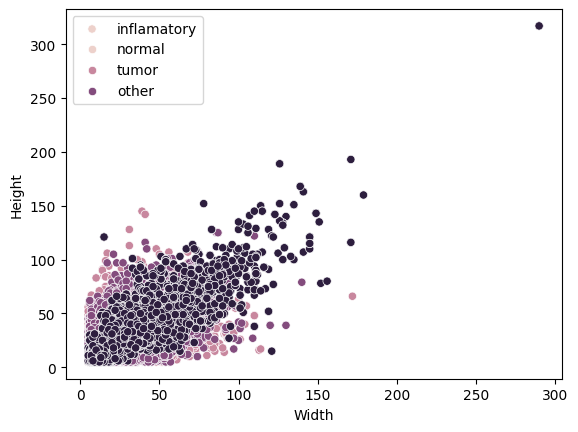

In [30]:
data_loader = Data(dataset, classes)
data_loader.plot_2D()

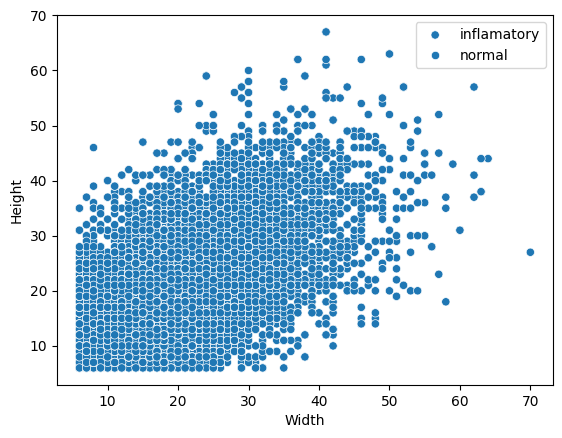

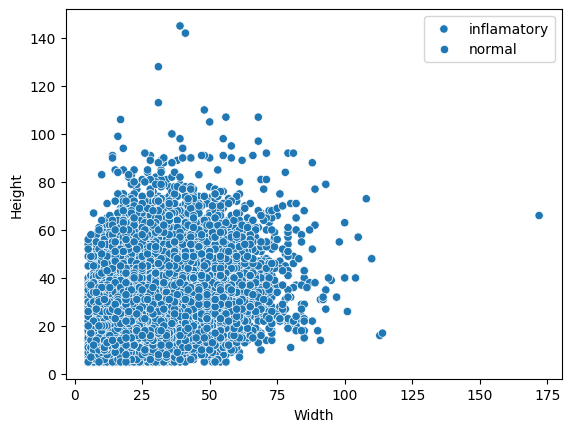

In [ ]:
data_loader.plot_classes_2D(0)
data_loader.plot_classes_2D(1)
data_loader.plot_classes_2D(2)
data_loader.plot_classes_2D(3)